In [1]:
import handcalcs.render

Trapezoid Rule (for numerical approximation of integration) = 

$$\sum_{k=0}^{n}\frac{f(x_{k})+f(x_{k+1})}{2}\Delta x_{k}=(\frac{f(x_{0})}{2} + f(x_{1}) + f(x_{2}) + ... + f(x_{n - 1}) + \frac{f(x_{n})}{2})\Delta x$$

Newton's difference quotient (for numerical approximation of differentiation) = 

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x + h) - f(x)}{h}$$

Symmetric difference quotient (for numerical approximation of differentiation) = 

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x + h) - f(x - h)}{2h}$$

Fundemental theorem of calculus = $$\int _{a}^{b}\,f(x)dx=\left[F(x)\right]_{a}^{b}=F(b)-F(a)$$

In [ ]:
def numerical_derivative(f, x, h=0.0000001):
    return ((f(x + h) - f(x)) / h, (f(x + h) - f(x - h)) / (2 * h))

In [ ]:
def symbolic_derivative(f):
    pass

In [37]:
def definite_integral(f, a, b):
    n = abs(b - a) * 100000
    delta_x = (b - a)/n
    l = [f(a + (i*delta_x)) for i in range(n)]
    l[0] = l[0]/2
    l[-1] = l[-1]/2
    return sum(l) * delta_x

In [51]:
g = lambda x: 3*x**2
print(numerical_derivative(g, 1))

(6.000000301042974, 5.999999999062311)


In [40]:
g = lambda x: x**2
print(definite_integral(g, 0, 3))

8.999910000350102


In [1]:
web = "https://www.whitman.edu/mathematics/calculus_online/section08.06.html"

<IPython.core.display.Javascript object>


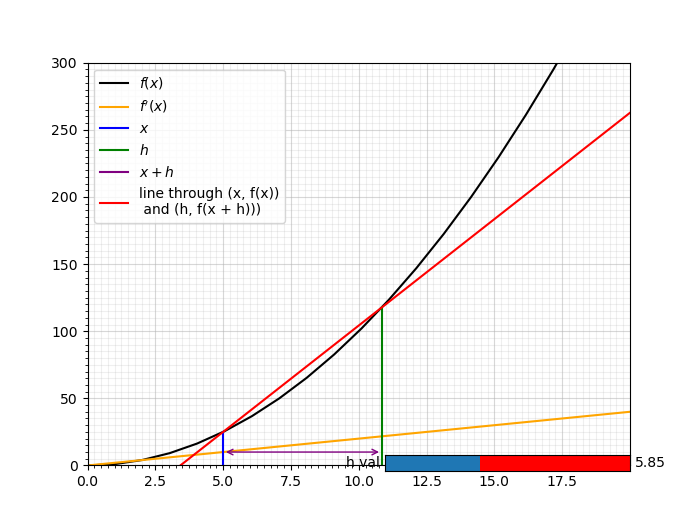

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
from sympy import *
import math
fig = plt.figure()
ax = plt.subplot(111)

plt.xlim(0, 20)
plt.ylim(0, 300)

x_axis = np.linspace(0, 100, 100)

def get_x_intersect(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    c = -(m * x1) + y1
    """
    y = mx + c
        |
        v
    x = (y-c) / m
    """
    return (0-c)/m  # Sub 0 into where y would be to find the root

def get_y(x1, y1, x2, y2, x3):
    """
        y2 - y1
    m = -------
        x2 - x1
    
    
    y = mx + c
        |
        v
    c = -mx + y
    """
    m = (y2 - y1) / (x2 - x1)
    c = -(m * x1) + y1
    return m*x3 + c

k = symbols("k")
expr = k**2
f = lambdify(k, expr, math)
f_prime = lambdify(k, diff(expr, k), math)
x = 5
h = 10

_, xlim = plt.xlim()
ax.plot(x_axis, f(x_axis), color="black", label=r"$f(x)$")
ax.plot(x_axis, f_prime(x_axis), color="orange", label=r"$f'(x)$")
x_line, = ax.plot([x, x], [f(x), 0], color="blue", label=r"$x$")
h_line, = ax.plot([x + h, x + h], [f(x + h), 0], color="green", label=r"$h$")
plt.plot([], [], color="purple", label=r"$x + h$")
tangent_line, = ax.plot(
    [
        get_x_intersect(x, f(x), x + h, f(x + h)), x, x + h, xlim
    ], 
    [
        f(0), f(x), f(x + h), get_y(x, f(x), x + h, f(x + h), xlim)
    ],
    color="red", label="line through (x, f(x))\n and (h, f(x + h)))"
)


slider_ax = fig.add_axes([0.55, 0.1, 0.35, 0.03], facecolor="red")
slider = Slider(slider_ax, "h val", 0.01, x + h, valinit=x + h)

arrow = ax.annotate('', xy=(x + h,10), xytext=(x, 10),
            arrowprops={'arrowstyle': '<->', "color": "purple"})

ax.legend(loc="upper left")

def sliders_on_change(val):
    print(val)
    h = val
    h_line.set_xdata([x + h, x + h])
    h_line.set_ydata([f(x + h), 0])
    tangent_line.set_xdata([get_x_intersect(x, f(x), x + h, f(x + h)), x, x + h, xlim])
    tangent_line.set_ydata([f(0), f(x), f(x + h), get_y(x, f(x), x + h, f(x + h), xlim)])
    arrow.xy = (x + h, 10)
    fig.canvas.draw_idle()

slider.on_changed(sliders_on_change) 

ax.set_xticks(np.arange(0, 20, 2.5))
ax.set_xticks(np.arange(0, 20, 0.25), minor=True)
ax.set_yticks(np.arange(0, 301, 50))
ax.set_yticks(np.arange(0, 301, 5), minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()